<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/i2i_funding_APP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 12 club (com.twelve.club)

2 Lendenclub investment (com.innofinsolutions.lendenclub.lender)

3 Lendenclub borrower (com.innofinsolutions.instamoney)

4 Faircent (com.app.faircent)

5 Lendbox(in.lendbox.app)

6 Rupeecircle(com.fintelligence.rupeecircle)

7 i2i funding (com.i2ifunding_investorapp)

8 i2i borrower (com.i2iborrower)
 

In [3]:
# Define and configure Google Play Scraper library
phonepe_users_reviews = reviews_all(
    'com.i2ifunding_investorapp',
    sleep_milliseconds=0,
    #lang='chi', # Default language is 'en', set language to Chinese.
    #country='hk', # Default country is 'us', set country to Hong Kong.
    count=100000, # defaults to 100
    sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
)

In [4]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,53c812f2-e7ae-437d-a3b6-803cc7b190d8,Vineeta Agrawal,https://play-lh.googleusercontent.com/a/AGNmyx...,My experience is very good with app. Transacti...,5,0,11.4.7,2023-04-21 18:18:15,"Dear User, Thank you for your suggestions. We ...",2023-04-24 09:47:27,11.4.7
1,bcf5cb05-c5fc-4e68-a197-075863f33dca,Sudhanshu Thawait,https://play-lh.googleusercontent.com/a-/ACB-R...,Forget about interest I lost my principal amou...,1,18,11.4.7,2023-03-23 15:16:06,We regret the inconvenience you had to face. F...,2023-03-23 10:47:10,11.4.7
2,9b571f13-d626-4027-811a-1c3f3d626260,Aritra Raj Chatterjee,https://play-lh.googleusercontent.com/a-/ACB-R...,It is a great experience investing on i2ifundi...,5,0,11.4.7,2023-03-29 11:02:47,Thank you for your encouraging words. Happy In...,2023-03-30 09:59:42,11.4.7
3,a81efdbd-0c6b-4624-8f6d-4b3a0ee3945d,Yash Sarwan,https://play-lh.googleusercontent.com/a/AGNmyx...,The app has a user-friendly and seamless inter...,5,0,11.4.7,2023-04-30 20:08:29,We're thrilled to hear that you had a great ex...,2023-05-04 10:17:12,11.4.7
4,6e5e5664-f6ba-4516-9aff-50a580f50510,Khusi Kumari,https://play-lh.googleusercontent.com/a/AGNmyx...,Overall platform experience is good and the ap...,5,0,11.4.7,2023-04-06 07:15:56,"Hi, thank you very much for your feedback.",2023-04-12 08:09:29,11.4.7


In [5]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              477 non-null    object        
 1   userName              477 non-null    object        
 2   userImage             477 non-null    object        
 3   content               477 non-null    object        
 4   score                 477 non-null    int64         
 5   thumbsUpCount         477 non-null    int64         
 6   reviewCreatedVersion  370 non-null    object        
 7   at                    477 non-null    datetime64[ns]
 8   replyContent          307 non-null    object        
 9   repliedAt             307 non-null    datetime64[ns]
 10  appVersion            370 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 41.1+ KB


In [6]:
#df_reviews.to_csv('12club_review.csv')

In [7]:
# Count number of review scores
df_reviews['score'].value_counts()

5    272
1    139
4     27
3     26
2     13
Name: score, dtype: int64

<Axes: ylabel='score'>

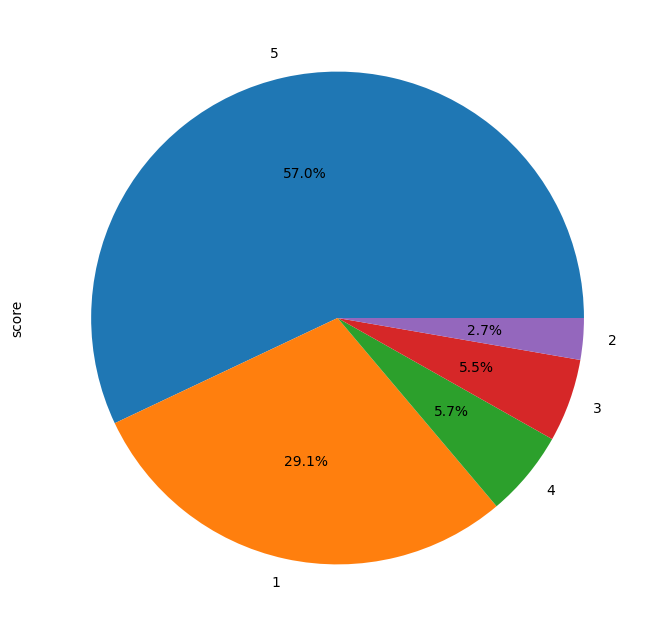

In [8]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [9]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [10]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,My experience is very good with app. Transacti...,5
1,Forget about interest I lost my principal amou...,1
2,It is a great experience investing on i2ifundi...,5
3,The app has a user-friendly and seamless inter...,5
4,Overall platform experience is good and the ap...,5


Install azure text analytics API

In [11]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.9 MB/s eta 0:00:00


In [12]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [13]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [14]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Review Content: My experience is very good with app. Transactions are very smooth and easy. I would request you to add a feature like auto swapping of interest amount on a monthly basis which can make the app more attractive. Thank you!
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Forget about interest I lost my principal amount also. Received only 25% of amount invested. Thank god I tested the app from small amount. Do not fall in their trap. Edit - It's more than three years still not received my principal. They don't do anything to recover your money Edit- it's been 5 years, they were going to pay in an year, got 25% only.
Review Content Sentiment: mixed
Review Content Score: 1
Review Content: It is a great experience investing on i2ifunding. The response time of them is absolutely great and not only that but also everything is clear and to the point. 👍☺️
Review Content Sentiment: positive
Review Content Score: 5
Review Content: The app has a user-frien

In [15]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

positive    274
negative    132
mixed        39
neutral      32
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

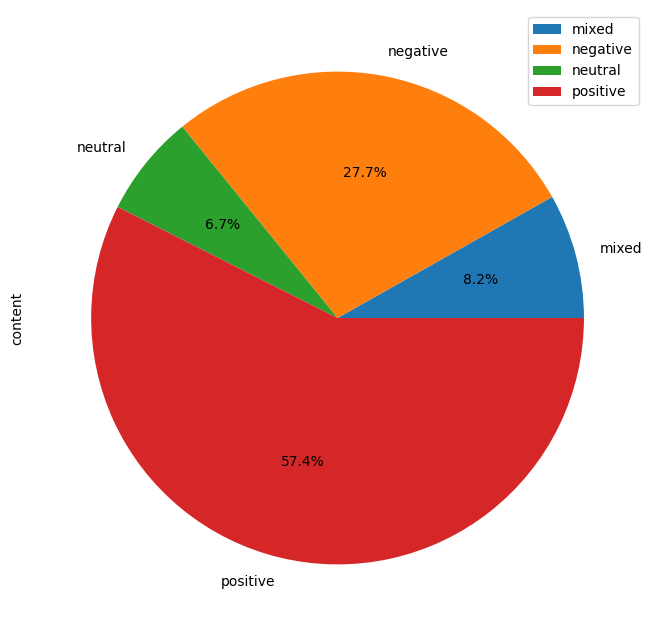

In [16]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [17]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                 16
           2                  1
           3                  5
           4                  7
           5                 10
negative   1                105
           2                 10
           3                 11
           4                  3
           5                  3
neutral    1                 10
           2                  1
           3                  4
           4                  1
           5                 16
positive   1                  8
           2                  1
           3                  6
           4                 16
           5                243
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

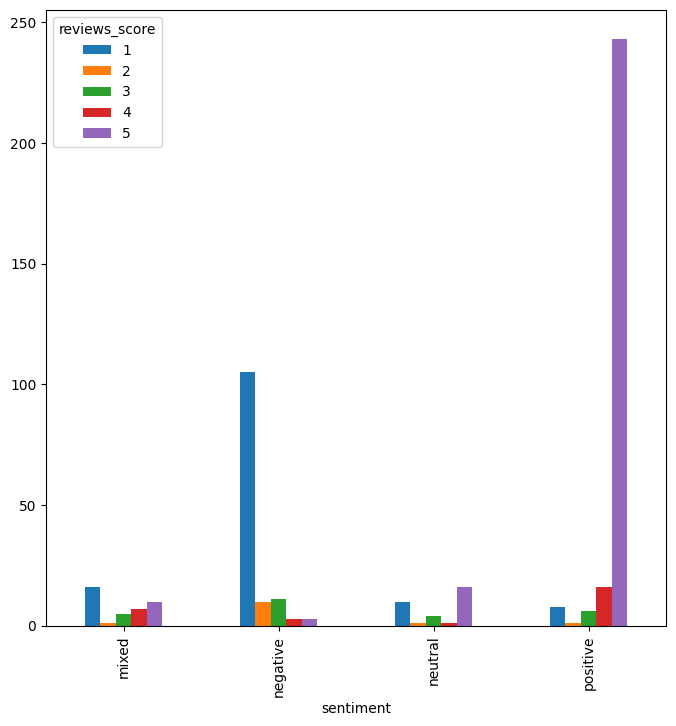

In [18]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [19]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        477 non-null    object
 1   sentiment      477 non-null    object
 2   reviews_score  477 non-null    object
dtypes: object(3)
memory usage: 11.3+ KB


In [20]:
reviews_content_sentiment.to_csv('i2iinvestor.csv')
reviews_content_sentiment.head()

,content,sentiment,reviews_score
0,My experience is very good with app. Transacti...,positive,5
1,Forget about interest I lost my principal amou...,mixed,1
2,It is a great experience investing on i2ifundi...,positive,5
3,The app has a user-friendly and seamless inter...,mixed,5
4,Overall platform experience is good and the ap...,positive,5


In [21]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [22]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [23]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [24]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        477 non-null    object
 1   sentiment      477 non-null    int64 
 2   reviews_score  477 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.3+ KB


In [25]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                  8
           2                  1
           3                  6
           4                 16
           5                243
1          1                 16
           2                  1
           3                  5
           4                  7
           5                 10
2          1                105
           2                 10
           3                 11
           4                  3
           5                  3
3          1                 10
           2                  1
           3                  4
           4                  1
           5                 16
Name: content, dtype: int64

After factorization of sentiment column, below is numberic values the mapping.

0 = Neutral
1 = Negative
2 = Positive
3 = Mixed

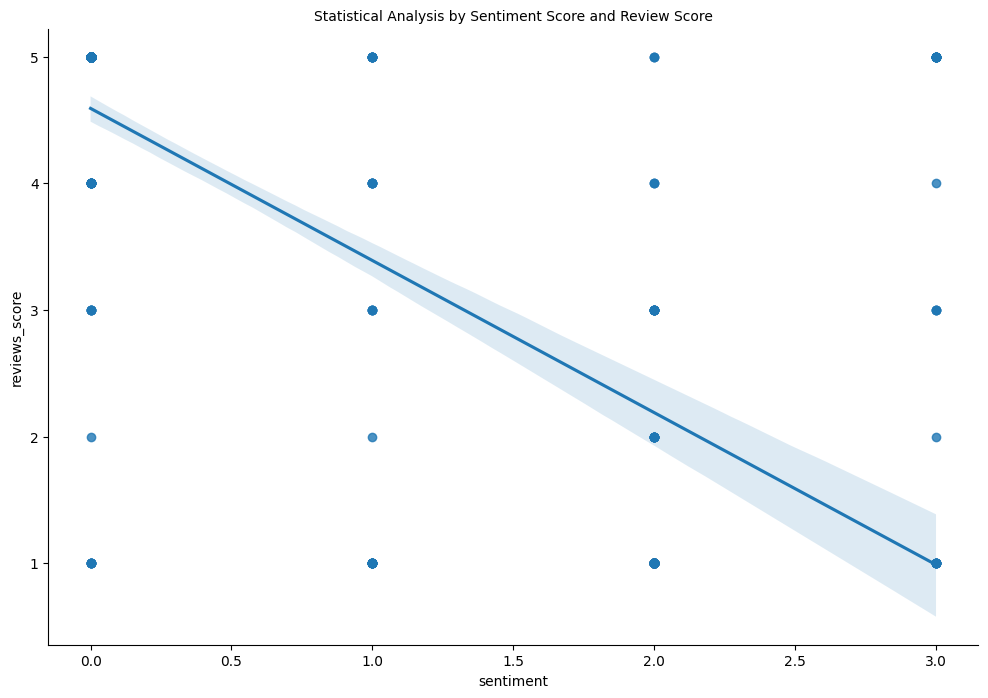

In [26]:
# Plotting sentiment & reviews_score columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y= 'reviews_score', data=reviews_content_sentiment_factorized)
sns.despine()

Data Analysis from Visualization

Positive sentiment (2) from review content is trending to higher reivew score.

Negative sentiment (1) from review content is trending to lower review score.

Neutral sentiment (0) from review content is trending to lower review score.

In other word, lower review score is trending to Neutral sentiment (0).

From this observation, if sentiment is negative to neutral, user would give lower review score.